This notebook focuses on classifying human and AI generated text using DL models (BERT, DistilBERT and RoBERTa) \\
  Project: this notebook contribute to a part of the CW of AML module, MSc CS&AI   \\
Author: Fouzia Shile


1. Enable GPU in Google Colab
Go to Runtime → Change runtime type → Select "GPU" → Click Save.
Then, check if Colab detects the GPU by running:

In [1]:
# check if a GPU is available to accelerate deep learning training with TensorFlow.
import tensorflow as tf
print("Num GPUs available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs available:  1


2. Use TensorFlow's Mixed Precision (Faster on GPU)
For NVIDIA GPUs (T4, A100, V100), enable mixed precision to speed up training:

In [4]:
# enable mixed precision training for faster training and lower memory usage. my  GPU  must support float16.
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [5]:
!pip install keras-core --upgrade # deep learning library
!pip install -q keras-nlp # for NLP tasks like tokenization
!pip install seaborn # for plotting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 46.9 MB/s eta 0:00:00


Loads standard Python, TensorFlow, Keras, and plotting libraries.

In [6]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt


print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.18.0
Keras version: 0.1.7
KerasNLP version: 0.18.1


# Load datasets

In [7]:
df1 = pd.read_csv('dforiginal.csv') # this is the first dataset with few samples
df2 = pd.read_csv('detectAItext.csv') # this is the 2nd dataset with new prompts and new LLMs,...


In [8]:
print('size of df1 is: ', df1.shape)
print('size of df2 is: ', df2.shape)

size of df1 is:  (1378, 4)
size of df2 is:  (44868, 5)


In [9]:
df1.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [10]:
df2.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


# Data exploration

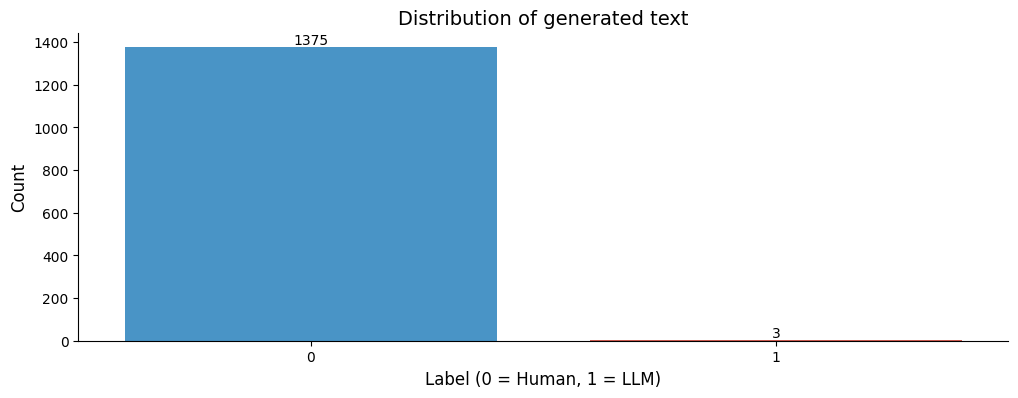

In [11]:
# distribution of the  text essays in the original dataset
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()


ax = sns.countplot(
    data=df1,
    x="generated",
    hue="generated",
    palette=["#3498db", "#e74c3c"],
    legend=False
)


for container in ax.containers:
    ax.bar_label(container)


ax.set_title("Distribution of generated text", fontsize=14)
ax.set_xlabel("Label (0 = Human, 1 = LLM)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

In [12]:
df2.rename(columns = {"label":"generated"}, inplace=True)

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


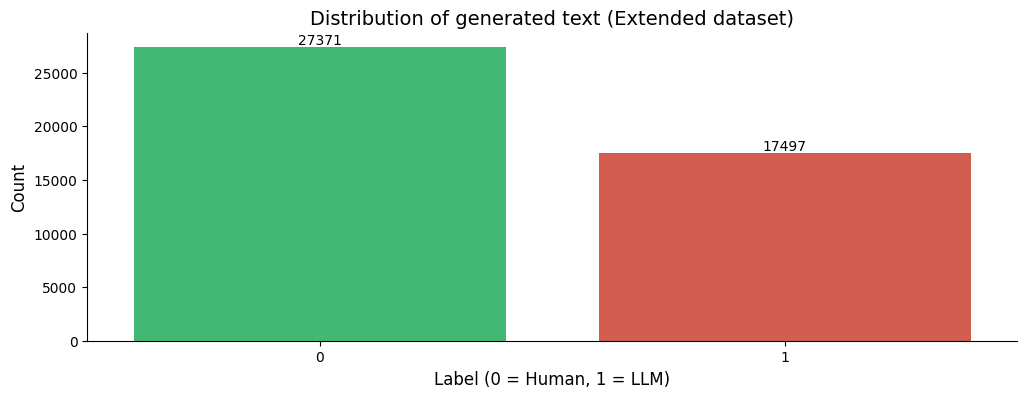

In [13]:

# distribution of text essays in the extended dataset
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(
    data=df2,
    x="generated",
    hue="generated",        #
    palette=["#2ecc71", "#e74c3c"],
    legend=False
)


for container in ax.containers:
    ax.bar_label(container)


ax.set_title("Distribution of generated text (Extended dataset)", fontsize=14)
ax.set_xlabel("Label (0 = Human, 1 = LLM)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()


Merging datasets

In [14]:
df_final = pd.concat([df2[["text", "generated"]], df1[["text", "generated"]]])

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46246 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [15]:
# Save the concatenated df to a csv file
df_final.to_csv('concatenated_dataset.csv', index=False)


In [16]:
# Read it to verify
df_check = pd.read_csv('concatenated_dataset.csv')
print(df_check.head())


                                                text  generated
0  Phones\n\nModern humans today are always on th...          0
1  This essay will explain if drivers should or s...          0
2  Driving while the use of cellular devices\n\nT...          0
3  Phones & Driving\n\nDrivers should not be able...          0
4  Cell Phone Operation While Driving\n\nThe abil...          0


In [17]:
df_final.shape

(46246, 2)

In [18]:
df_final.head()

,text,generated
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


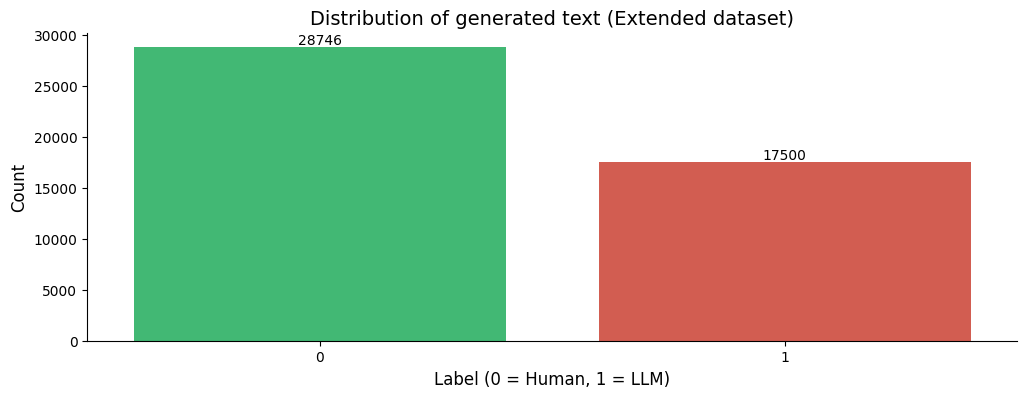

In [19]:
# distribution of text essays in the concatinated final dataset

f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(
    data=df_final,
    x="generated",
    hue="generated",        #
    palette=["#2ecc71", "#e74c3c"],
    legend=False
)


for container in ax.containers:
    ax.bar_label(container)

ax.set_title("Distribution of generated text (Extended dataset)", fontsize=14)
ax.set_xlabel("Label (0 = Human, 1 = LLM)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()

Text length statistics:
count    46246.000000
mean      2244.614496
std        981.941658
min         48.000000
25%       1581.000000
50%       2070.000000
75%       2663.000000
max      18322.000000
Name: text_length, dtype: float64


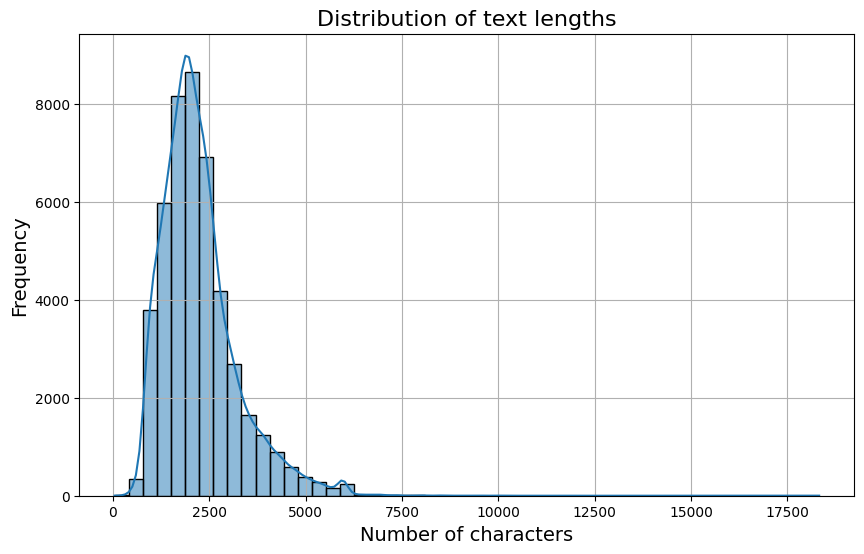

In [20]:

df_final['text_length'] = df_final['text'].apply(len)


print("Text length statistics:")
print(df_final['text_length'].describe())


plt.figure(figsize=(10,6))
sns.histplot(df_final['text_length'], bins=50, kde=True)
plt.title('Distribution of text lengths', fontsize=16)
plt.xlabel('Number of characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


Word count ctatistics:
count    46246.000000
mean       388.761428
std        167.367549
min          4.000000
25%        276.000000
50%        357.000000
75%        461.000000
max       1656.000000
Name: word_count, dtype: float64


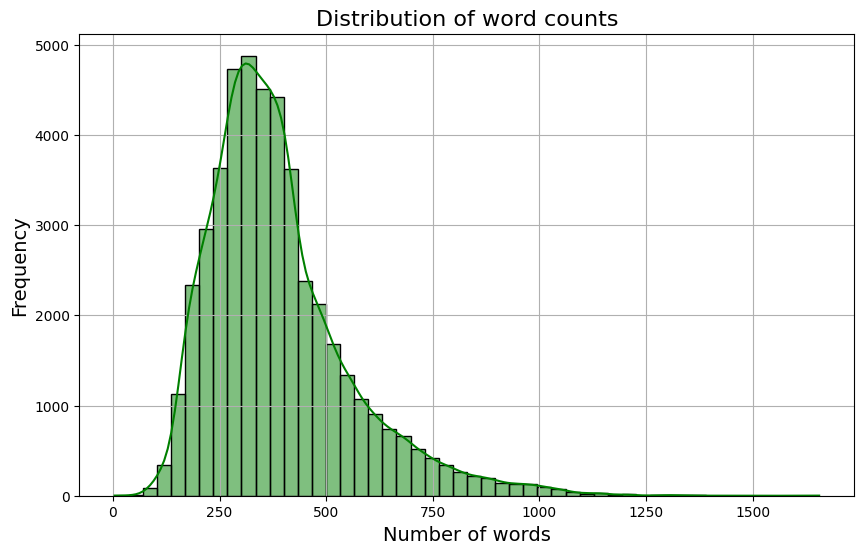

In [21]:

df_final['word_count'] = df_final['text'].apply(lambda x: len(x.split()))


print("Word count ctatistics:")
print(df_final['word_count'].describe())

plt.figure(figsize=(10,6))
sns.histplot(df_final['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of word counts', fontsize=16)
plt.xlabel('Number of words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


# data cleaning

In [22]:
# drop missing values in the 'text' column
df_final = df_final.dropna(subset=['text']).reset_index(drop=True)

# basic cleaning: convert to string, remove extra whitespace
df_final['text'] = df_final['text'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

# drop duplicate texts
df_final = df_final.drop_duplicates(subset=['text']).reset_index(drop=True)

# remove very short essays ( fewer than 10 words)
# df_final['word_count'] = df_final['text'].apply(lambda x: len(x.split()))
# df_final = df_final[df_final['word_count'] >= 10].reset_index(drop=True)

# confirm shape and class balance
print(f"Final dataset shape: {df_final.shape}")
print(df_final['generated'].value_counts())  #  check class distribution


Final dataset shape: (44862, 4)
generated
0    27365
1    17497
Name: count, dtype: int64


In [23]:
df_final.head()

,text,generated,text_length,word_count
0,Phones Modern humans today are always on their...,0,2029,379
1,This essay will explain if drivers should or s...,0,2141,366
2,Driving while the use of cellular devices Toda...,0,1044,178
3,Phones & Driving Drivers should not be able to...,0,1243,212
4,Cell Phone Operation While Driving The ability...,0,1911,332


# Model training

BERT does feature extraction internally. \\
what makes BERT powerful is that is my feature extractor + classifier in one package.

## BERT

In [68]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final["text"],
                                                    df_final["generated"],
                                                    test_size=0.33,
                                                    random_state=42)

In [69]:
print(type(X_train), len(X_train))
print(X_train[:3])  # Preview a few entries


<class 'pandas.core.series.Series'> 30057
6567     Soccer club. Art club. Drama club. The list go...
39125    Imagination is more important than knowledge. ...
6484     I agree that we should have to be involved in ...
Name: text, dtype: object


In [70]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()


In [100]:
import keras_nlp
import tensorflow as tf

SEQ_LENGTH = 512

#   BERT preprocessor
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_base_en",
    sequence_length=SEQ_LENGTH
)

#  BERT classifier model
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor
)

# to freeze BERT backbone if testing without fine-tuning set False
classifier.backbone.trainable = False  # True for fine-tuning


In [87]:
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),  # 3e-5 if fine-tuning, 5e-4 == frozen
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [88]:
"""# earlier stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)"""


In [91]:
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 288s 221ms/step - loss: 0.8522 - sparse_categorical_accuracy: 0.3584 - val_loss: 0.8663 - val_sparse_categorical_accuracy: 0.3230
Epoch 2/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 160s 170ms/step - loss: 0.8505 - sparse_categorical_accuracy: 0.3636 - val_loss: 0.8663 - val_sparse_categorical_accuracy: 0.3230
Epoch 3/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 160s 170ms/step - loss: 0.8477 - sparse_categorical_accuracy: 0.3645 - val_loss: 0.8663 - val_sparse_categorical_accuracy: 0.3230


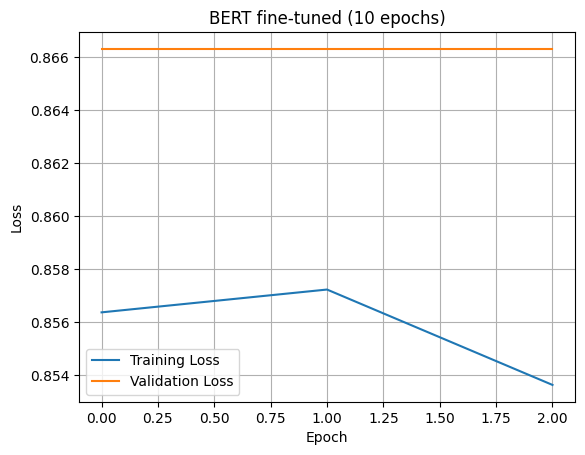

In [93]:
import matplotlib.pyplot as plt

def plot_training(history, title="BERT Training"):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training(history, title="BERT fine-tuned (10 epochs)")


In [94]:
y_pred_test = classifier.predict(X_test)


463/463 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step


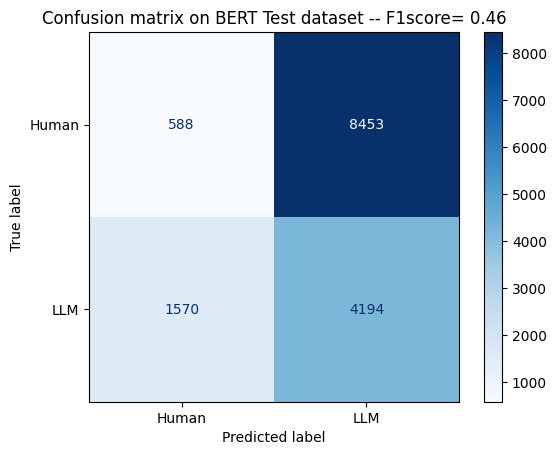

In [95]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def displayConfusionMatrix(y_true, y_pred, dataset="Test"):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human", "LLM"],
        cmap=plt.cm.Blues
    )
    tn, fp, fn, tp = confusion_matrix(
        y_true, np.argmax(y_pred, axis=1)
    ).ravel()
    f1_score = tp / (tp + ((fn + fp)/2))
    disp.ax_.set_title(f"Confusion matrix on {dataset} dataset -- F1score= {f1_score.round(2)}")

# Run it
displayConfusionMatrix(y_test, y_pred_test, "BERT Test")


In [96]:
from sklearn.metrics import classification_report
# Get predicted labels from model's probability output
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels, target_names=["Human", "LLM"]))


              precision    recall  f1-score   support

       Human       0.27      0.07      0.11      9041
         LLM       0.33      0.73      0.46      5764

    accuracy                           0.32     14805
   macro avg       0.30      0.40      0.28     14805
weighted avg       0.30      0.32      0.24     14805



In [47]:
import matplotlib.pyplot as plt

def plot_training(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


### BERT evaluation

Define a function to visualize the confusion matrix and calculate F1 score

In [97]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","LLM"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion matrix on " + dataset + " dataset -- F1score= " + str(f1_score.round(2)))


predictions on the test set

In [98]:
y_pred_test = classifier.predict(X_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step


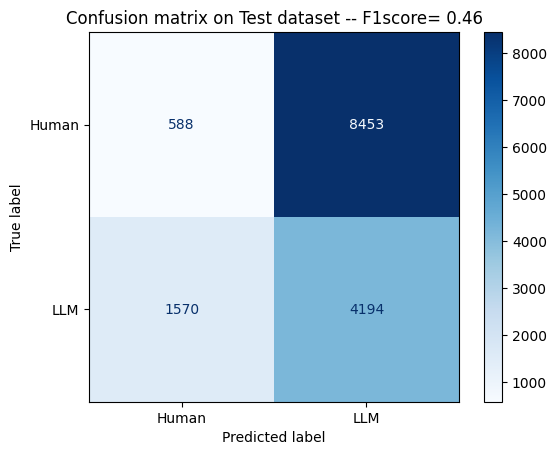

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

displayConfusionMatrix(y_test, y_pred_test,  "Test")


In [36]:
from sklearn.metrics import classification_report
import numpy as np

# Get predicted labels from model's probability output
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels, target_names=["Human", "LLM"]))


              precision    recall  f1-score   support

       Human       0.90      0.93      0.91      9041
         LLM       0.88      0.84      0.86      5764

    accuracy                           0.89     14805
   macro avg       0.89      0.88      0.89     14805
weighted avg       0.89      0.89      0.89     14805



## DistilBERT Model

DistilBertClassifier handle tokenization internally using the preprocessor.

Set up a DistilBERT classifier (faster version of BERT) using KerasNLP: \\

1- Tokenizes text \\
2- Uses 512-token max sequence length \\
3- Uses 2 output classes: Human vs AI \\
4- Freezes BERT layers for faster training (no fine-tuning)

As optimizer, I have used Adam optimizer  

In [110]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final["text"],
                                                    df_final["generated"],
                                                    test_size=0.33,
                                                    random_state=42)

In [111]:
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()


In [139]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = True
# Re-compile (e.g., with a new learning rate)

classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Explicitly use TensorFlow's optimizer
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)





classifier.summary()

Preprocessor: "distil_bert_text_classifier_preprocessor_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_9 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_9[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

Split combined dataset into training and testing subsets

Train the model on training data for x epoch. \\
Suggestions: \\
1- Train for more epochs ( 3–5) \\
2- Use EarlyStopping for better generalization \\
3- Unfreeze BERT (classifier.backbone.trainable = True) for full fine-tuning


In [140]:
# earlier stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [141]:
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 150s 116ms/step - loss: 0.7031 - sparse_categorical_accuracy: 0.4085 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.3892
Epoch 2/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: 0.7032 - sparse_categorical_accuracy: 0.4096 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.3892
Epoch 3/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: 0.7029 - sparse_categorical_accuracy: 0.4125 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.3892
Epoch 4/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: 0.7030 - sparse_categorical_accuracy: 0.4119 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.3892
Epoch 5/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: 0.7029 - sparse_categorical_accuracy: 0.4088 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.3892
Epoch 6/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - loss: 0.7027 - sparse_categorical_accuracy: 0.4123 - val_loss: 0.7044 - val_sparse_categorical_accurac

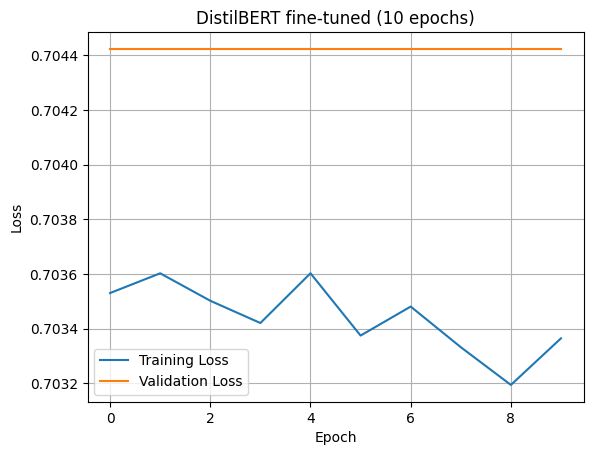

In [142]:
import matplotlib.pyplot as plt

def plot_training(history, title="BERT Training"):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training(history, title="DistilBERT fine-tuned (10 epochs)")


In [143]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","LLM"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion matrix on " + dataset + " dataset -- F1score= " + str(f1_score.round(2)))


In [144]:
y_pred_test = classifier.predict(X_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step


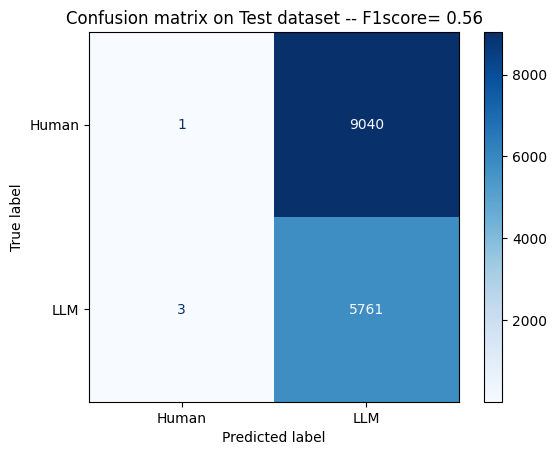

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [148]:
from sklearn.metrics import classification_report
import numpy as np

# Get predicted labels from model's probability output
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels, target_names=["Human", "LLM"]))


              precision    recall  f1-score   support

       Human       0.25      0.00      0.00      9041
         LLM       0.39      1.00      0.56      5764

    accuracy                           0.39     14805
   macro avg       0.32      0.50      0.28     14805
weighted avg       0.30      0.39      0.22     14805



## RoBERTa model

In [178]:
import keras_nlp
import tensorflow as tf

# Preprocessor
preprocessor = keras_nlp.models.RobertaPreprocessor.from_preset(
    "roberta_base_en",
    sequence_length=512
)

# Classifier
classifier = keras_nlp.models.RobertaClassifier.from_preset(
    "roberta_base_en",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor
)

# Freeze the backbone
classifier.backbone.trainable = True

# Compile the model
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)



In [180]:
# earlier stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [181]:
# Fit the model
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 288s 225ms/step - loss: 0.6884 - sparse_categorical_accuracy: 0.5988 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.6107
Epoch 2/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 167s 175ms/step - loss: 0.6887 - sparse_categorical_accuracy: 0.5998 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.6107
Epoch 3/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 167s 176ms/step - loss: 0.6888 - sparse_categorical_accuracy: 0.6006 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.6107
Epoch 4/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 167s 175ms/step - loss: 0.6884 - sparse_categorical_accuracy: 0.5999 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.6107
Epoch 5/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 167s 175ms/step - loss: 0.6885 - sparse_categorical_accuracy: 0.5989 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.6107
Epoch 6/10
940/940 ━━━━━━━━━━━━━━━━━━━━ 167s 175ms/step - loss: 0.6884 - sparse_categorical_accuracy: 0.6002 - val_loss: 0.6874 - val_sparse_categoric

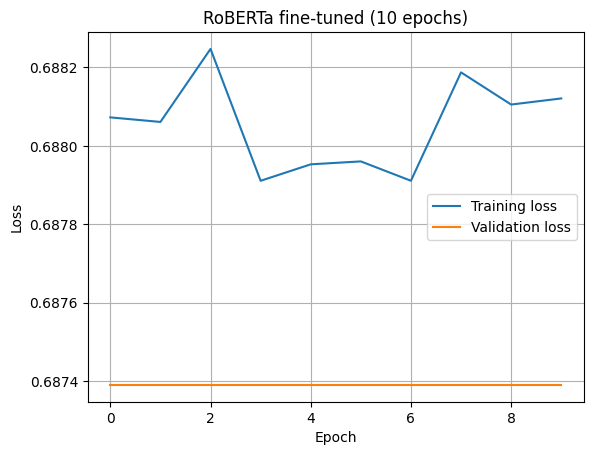

In [182]:
import matplotlib.pyplot as plt

def plot_training(history, title="RoBERTa Training"):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training(history, title="RoBERTa fine-tuned (10 epochs)")


In [184]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","LLM"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion matrix on " + dataset + " dataset -- F1score= " + str(f1_score.round(2)))


In [185]:
y_pred_test = classifier.predict(X_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step


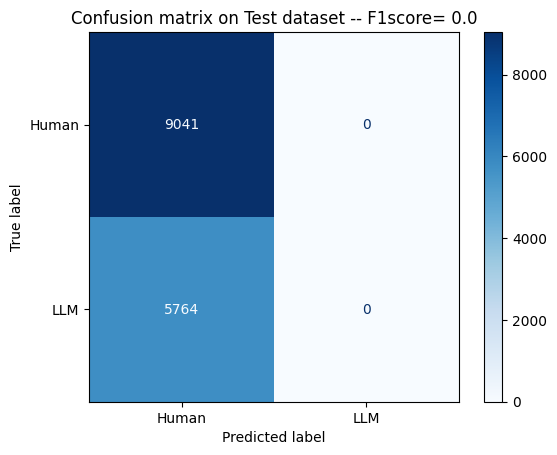

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [187]:
from sklearn.metrics import classification_report
import numpy as np

# Get predicted labels from model's probability output
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels, target_names=["Human", "LLM"]))


              precision    recall  f1-score   support

       Human       0.61      1.00      0.76      9041
         LLM       0.00      0.00      0.00      5764

    accuracy                           0.61     14805
   macro avg       0.31      0.50      0.38     14805
weighted avg       0.37      0.61      0.46     14805



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Performance analysis by essay length categories

##BERT

In [199]:

df_final['word_count'] = df_final['text'].apply(lambda x: len(str(x).split()))

#   Define text length categories
def assign_length_bin(word_count):
    if word_count <= 200:
        return 'Short'
    elif word_count <= 500:
        return 'Medium'
    else:
        return 'Long'

df_final['length_bin'] = df_final['word_count'].apply(assign_length_bin)



In [202]:

#   Train-test split

X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()
X_train, X_test_bert, y_train, y_test_bert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)

In [203]:
import keras_nlp
import tensorflow as tf
from sklearn.model_selection import train_test_split

# prepare the preprocessor and frozen classifier
preprocessor = keras_nlp.models.BertPreprocessor.from_preset(
    "bert_base_en",
    sequence_length=512
)

classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor
)

# Freeze the backbone (no fine-tuning)
classifier.backbone.trainable = False

# Compile with frozen settings
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# ensure we have a cleaned df_final with ['text', 'generated', 'word_count'] columns
# split data
X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()

X_train, X_test_bert, y_train, y_test_bert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)

# train the frozen model
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test_bert, y_test_bert),
    epochs=1,
    batch_size=32
)



940/940 ━━━━━━━━━━━━━━━━━━━━ 139s 109ms/step - loss: 0.4963 - sparse_categorical_accuracy: 0.7708 - val_loss: 0.3630 - val_sparse_categorical_accuracy: 0.8484


In [204]:
# predict to get logits
y_pred_logits_bert = classifier.predict(X_test_bert)


463/463 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step


In [207]:

from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

def evaluate_by_length(X_test, y_test, y_pred_logits, word_bins=[200, 500]):
    y_pred = np.argmax(y_pred_logits, axis=1)
    word_counts = np.array([len(text.split()) for text in X_test])

    categories = {
        "Short (≤ 200)": word_counts <= word_bins[0],
        "Medium (201–500)": (word_counts > word_bins[0]) & (word_counts <= word_bins[1]),
        "Long (> 500)": word_counts > word_bins[1]
    }

    results = []
    for category, mask in categories.items():
        if np.sum(mask) == 0:
            continue
        y_true_cat = np.array(y_test)[mask]
        y_pred_cat = y_pred[mask]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        report = classification_report(y_true_cat, y_pred_cat, output_dict=True, zero_division=0)
        f1_llm = report["1"]["f1-score"]
        f1_human = report["0"]["f1-score"]

        results.append({
            "Category": category,
            "Accuracy": round(acc, 4),
            "F1 (LLM)": round(f1_llm, 4),
            "F1 (Human)": round(f1_human, 4)
        })

    return pd.DataFrame(results)

# 6. Evaluate
df_result_bert = evaluate_by_length(X_test_bert, y_test_bert, y_pred_logits_bert)
print(df_result_bert)

           Category  Accuracy  F1 (LLM)  F1 (Human)
0     Short (≤ 200)    0.9126    0.8870      0.9287
1  Medium (201–500)    0.8512    0.8541      0.8482
2      Long (> 500)    0.8090    0.4250      0.8855


## DistilBERT

In [209]:
# train-test split

X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()
X_train, X_test_Dbert, y_train, y_test_Dbert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)


In [210]:
import keras_nlp
import tensorflow as tf
from sklearn.model_selection import train_test_split

preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# pretrained classifier
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# no fine-tuning
classifier.backbone.trainable = False

# compile with frozen settings
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


# Ensure we have a cleaned df_final with ['text', 'generated', 'word_count'] columns
# split  data
X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()

X_train, X_test_Dbert, y_train, y_test_Dbert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)

# train the frozen model
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test_Dbert, y_test_Dbert),
    epochs=1,
    batch_size=32
)



940/940 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - loss: 0.1594 - sparse_categorical_accuracy: 0.9353 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8580


In [211]:
# predict to get logits
y_pred_logits_Dbert = classifier.predict(X_test_Dbert)



463/463 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step


In [216]:

from sklearn.metrics import classification_report, accuracy_score


def evaluate_by_length(X_test, y_test, y_pred_logits, word_bins=[200, 500]):
    y_pred = np.argmax(y_pred_logits, axis=1)
    word_counts = np.array([len(text.split()) for text in X_test])

    categories = {
        "Short (≤ 200)": word_counts <= word_bins[0],
        "Medium (201–500)": (word_counts > word_bins[0]) & (word_counts <= word_bins[1]),
        "Long (> 500)": word_counts > word_bins[1]
    }

    results = []
    for category, mask in categories.items():
        if np.sum(mask) == 0:
            continue
        y_true_cat = np.array(y_test)[mask]
        y_pred_cat = y_pred[mask]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        report = classification_report(y_true_cat, y_pred_cat, output_dict=True, zero_division=0)
        f1_llm = report["1"]["f1-score"]
        f1_human = report["0"]["f1-score"]

        results.append({
            "Category": category,
            "Accuracy": round(acc, 4),
            "F1 (LLM)": round(f1_llm, 4),
            "F1 (Human)": round(f1_human, 4)
        })

    return pd.DataFrame(results)

#   evaluate
df_result_bert = evaluate_by_length(X_test_bert, y_test_Dbert, y_pred_logits_Dbert)
print(df_result_bert)

           Category  Accuracy  F1 (LLM)  F1 (Human)
0     Short (≤ 200)    0.8619    0.8401      0.8785
1  Medium (201–500)    0.8875    0.8932      0.8810
2      Long (> 500)    0.7399    0.3689      0.8362


## RoBERTa

In [217]:
# train-test split

X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()
X_train, X_test_Dbert, y_train, y_test_Robert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)


In [218]:
import keras_nlp
import tensorflow as tf
from sklearn.model_selection import train_test_split

# preprocessor
preprocessor = keras_nlp.models.RobertaPreprocessor.from_preset(
    "roberta_base_en",
    sequence_length=512
)

# classifier
classifier = keras_nlp.models.RobertaClassifier.from_preset(
    "roberta_base_en",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor
)

# no fine-tuning
classifier.backbone.trainable = False

# compile with frozen settings
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


# ensure we have a cleaned df_final with ['text', 'generated', 'word_count'] columns
# split data
X_full = df_final['text'].tolist()
y_full = df_final['generated'].tolist()

X_train, X_test_Robert, y_train, y_test_Robert = train_test_split(
    X_full, y_full, test_size=0.33, stratify=y_full, random_state=42
)

# train the frozen model
history = classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test_Robert, y_test_Robert),
    epochs=1,
    batch_size=32
)



940/940 ━━━━━━━━━━━━━━━━━━━━ 154s 120ms/step - loss: 0.2118 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.0790 - val_sparse_categorical_accuracy: 0.9705


In [219]:
# predict to get logits
y_pred_logits_Robert = classifier.predict(X_test_Robert)



463/463 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step


In [220]:

from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

def evaluate_by_length(X_test, y_test, y_pred_logits, word_bins=[200, 500]):
    y_pred = np.argmax(y_pred_logits, axis=1)
    word_counts = np.array([len(text.split()) for text in X_test])

    categories = {
        "Short (≤ 200)": word_counts <= word_bins[0],
        "Medium (201–500)": (word_counts > word_bins[0]) & (word_counts <= word_bins[1]),
        "Long (> 500)": word_counts > word_bins[1]
    }

    results = []
    for category, mask in categories.items():
        if np.sum(mask) == 0:
            continue
        y_true_cat = np.array(y_test)[mask]
        y_pred_cat = y_pred[mask]

        acc = accuracy_score(y_true_cat, y_pred_cat)
        report = classification_report(y_true_cat, y_pred_cat, output_dict=True, zero_division=0)
        f1_llm = report["1"]["f1-score"]
        f1_human = report["0"]["f1-score"]

        results.append({
            "Category": category,
            "Accuracy": round(acc, 4),
            "F1 (LLM)": round(f1_llm, 4),
            "F1 (Human)": round(f1_human, 4)
        })

    return pd.DataFrame(results)

# evaluate
df_result_bert = evaluate_by_length(X_test_bert, y_test_Robert, y_pred_logits_Robert)
print(df_result_bert)

           Category  Accuracy  F1 (LLM)  F1 (Human)
0     Short (≤ 200)    0.9788    0.9715      0.9831
1  Medium (201–500)    0.9787    0.9778      0.9795
2      Long (> 500)    0.9345    0.6990      0.9633


## Visualization of results


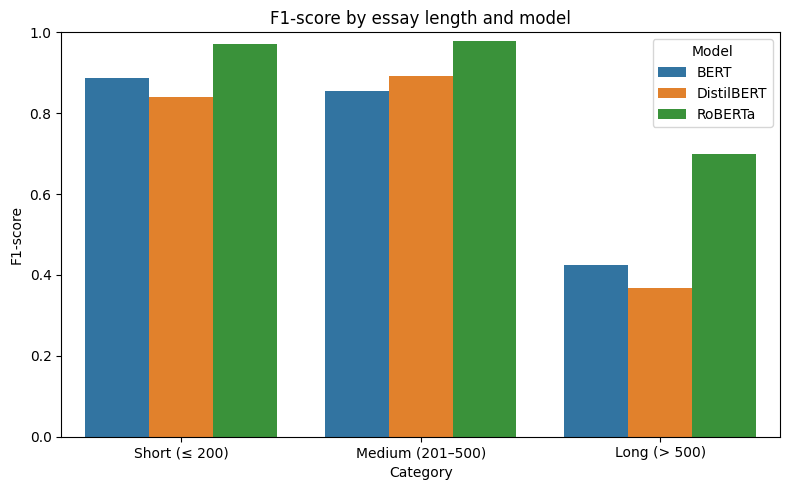

In [222]:
# create a combined dataframe for LLM F1-scores across models
f1_llm_comparison = pd.DataFrame({
    "Category": ["Short (≤ 200)", "Medium (201–500)", "Long (> 500)"],
    "BERT": [0.8870, 0.8541, 0.4250],
    "DistilBERT": [0.8401, 0.8932, 0.3689],
    "RoBERTa": [0.9715, 0.9778, 0.6990]
})

# melt the data for seaborn plotting
df_f1_llm_melted = f1_llm_comparison.melt(id_vars="Category",
                                          var_name="Model", value_name="F1-score")


plt.figure(figsize=(8, 5))
sns.barplot(data=df_f1_llm_melted, x="Category", y="F1-score", hue="Model")
plt.title("F1-score by essay length and model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


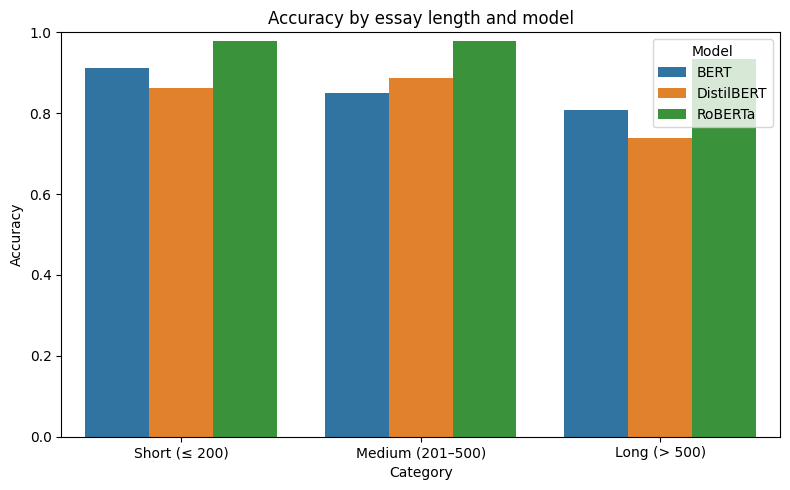

In [224]:
# create a combined dataframe for Accuracy across models
accuracy_comparison = pd.DataFrame({
    "Category": ["Short (≤ 200)", "Medium (201–500)", "Long (> 500)"],
    "BERT": [0.9126, 0.8512, 0.8090],
    "DistilBERT": [0.8619, 0.8875, 0.7399],
    "RoBERTa": [0.9788, 0.9787, 0.9345]
})

# melt the data for seaborn plotting
df_acc_melted = accuracy_comparison.melt(id_vars="Category",
                                         var_name="Model", value_name="Accuracy")


plt.figure(figsize=(8, 5))
sns.barplot(data=df_acc_melted, x="Category", y="Accuracy", hue="Model")
plt.title("Accuracy by essay length and model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
